In [1]:
import sys

if 'google.colab' in sys.modules:

    # Authenticate user to Google Cloud
    from google.colab import auth
    auth.authenticate_user()

In [2]:
# Define project information
PROJECT_ID = "wscc-sandbox-app-wsky" # @param {type:"string"}
LOCATION = "us-central1" # @param {type:"string"}
# Using us-east4 throws "400 Model Garden is not available in the current region" when loading pretrained model in the next step

# Initialize Vertex AI
import vertexai
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [3]:
from vertexai.preview.vision_models import ImageQnAModel

image_qna_model = ImageQnAModel.from_pretrained("imagetext@001")

ValueError: Could not save to JPEG for display

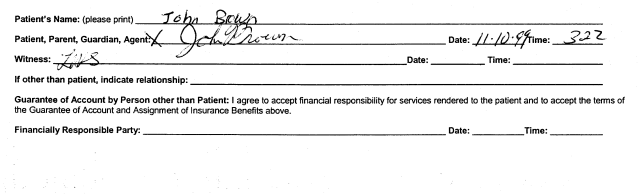

In [9]:
from vertexai.preview.vision_models import Image

# Load the image file as Image object
cloud_next_image = Image.load_from_file("./image-0.png")
cloud_next_image.show()

In [10]:
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What is the Patient name?",
)

['john bruy']

In [11]:
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What has the Gaurdian name?",
)

['john']

In [12]:
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What is the time?",
)

['327']

In [13]:
# adunai: Let's do some more tests
image_qna_model.ask_question(
    image=cloud_next_image,
    question="Are there any financially resonsible parties?",
)

['yes']

In [14]:
# Well, at least you tried... :(

In [22]:
# adunai: let's have more fun
queries = [
    "What's the date in document?",
    "What's the year in document?",
    "Is the year in document before 2000?",
    "Is the year in document after 2000?",
    "Is the year in document 1999?",
]
for query in queries:
    print(query, image_qna_model.ask_question(
        image=cloud_next_image,
        question=query,
    ))

What's the date in document? ['11/10/14']
What's the year in document? ['2012']
Is the year in document before 2000? ['no']
Is the year in document after 2000? ['no']
Is the year in document 1999? ['no']


In [23]:
# Nice try anyway!